In [1]:
## first block of code is just importing the requirements of the project

import sys 
import os
import h5py
import pickle
from matplotlib import pyplot as plt

from scipy import ndimage as ndi
from scipy import stats as sstats

import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from random import shuffle
from tqdm import tqdm, tnrange, tqdm_notebook
import collections
import random
import mahotas 
from sklearn.preprocessing import normalize
from PIL import Image
import imutils
import logging

from glob import glob

In [2]:
# this block of code is importing all the various parts of the project from their respective modules
from icon_util_v2 import *
from methods_v2 import *
from aberrations import *

In [3]:
hdf5_file = h5py.File('LLD-icon.hdf5', 'r')
images, _ = (hdf5_file['data'], hdf5_file['labels/resnet/rc_64'])
images = images[:100]
# transpose the images because they're stored in a weird color channel first format, as indicated by shape[0] being 3
images = [np.transpose(i) if i.shape[0] == 3 else i for i in images]
print(len(images))

100


In [13]:
image_set_name = "icon100"

logdir = "Logs20211001_7"
if not os.path.exists("Logs"):
    os.mkdir("Logs")
if not os.path.exists("Logs/"+logdir):
        os.mkdir("Logs/"+logdir)

method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
timm_names=['vit_small_r26_s32_224',
            'cspdarknet53',
            'tf_efficientnetv2_l',
            'resnet50',
            'ecaresnetlight',
            'mixnet_s',
            'res2next50',
            'wide_resnet50_2']
methods = [timm_method(modelname=i,cuda=True) for i in timm_names[:2]] + [i() for i in method_classes]
create_databases(images,methods,image_set_name)
run_in_chunks2(methods, images, aberrations, chunk_size=100, weights=[],          
    logdir=logdir)
print("Done")
#method_classes = [zernike_method, orb_method, neural_method, small_neural_method]
#methods=[m() for m in method_classes]

0
50
0
50
Chunk: 1
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
Done


In [20]:
logdir = "Logs20211001_3"
# Load all the logs into a single dataframe for processing
log_files = glob("Logs/"+logdir+"/*") # these are the logs that we're loading
print(log_files)
joined_logs = pd.concat([pd.read_csv(i) for i in log_files])
print(joined_logs)

['Logs/Logs20211001_3\\results_1.csv', 'Logs/Logs20211001_3\\results_10.csv', 'Logs/Logs20211001_3\\results_100.csv', 'Logs/Logs20211001_3\\results_101.csv', 'Logs/Logs20211001_3\\results_102.csv', 'Logs/Logs20211001_3\\results_103.csv', 'Logs/Logs20211001_3\\results_104.csv', 'Logs/Logs20211001_3\\results_105.csv', 'Logs/Logs20211001_3\\results_106.csv', 'Logs/Logs20211001_3\\results_107.csv', 'Logs/Logs20211001_3\\results_108.csv', 'Logs/Logs20211001_3\\results_109.csv', 'Logs/Logs20211001_3\\results_11.csv', 'Logs/Logs20211001_3\\results_110.csv', 'Logs/Logs20211001_3\\results_12.csv', 'Logs/Logs20211001_3\\results_13.csv', 'Logs/Logs20211001_3\\results_14.csv', 'Logs/Logs20211001_3\\results_15.csv', 'Logs/Logs20211001_3\\results_16.csv', 'Logs/Logs20211001_3\\results_17.csv', 'Logs/Logs20211001_3\\results_18.csv', 'Logs/Logs20211001_3\\results_19.csv', 'Logs/Logs20211001_3\\results_2.csv', 'Logs/Logs20211001_3\\results_20.csv', 'Logs/Logs20211001_3\\results_21.csv', 'Logs/Logs20211

Ranking


IndexError: index 2 is out of bounds for axis 0 with size 2

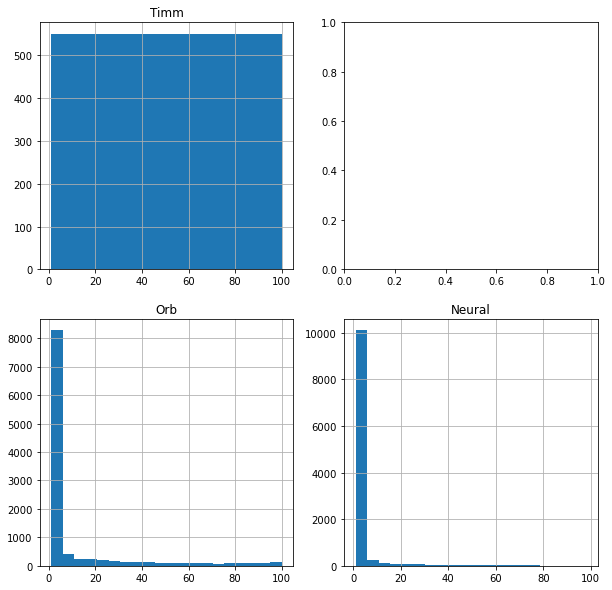

In [21]:
print("Ranking")
mpref=""
fig, axes = plt.subplots(nrows=2, ncols=2)
joined_logs[joined_logs['method']==mpref+'Timm_vit_small_r26_s32_224']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,0])
axes[0,0].set_title('Timm')
joined_logs[joined_logs['method']==mpref+'Orb']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,0])
axes[1,0].set_title('Orb')
joined_logs[joined_logs['method']==mpref+'Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,1])
axes[1,1].set_title('Neural')
joined_logs[joined_logs['method']=='Zernike']['rank'].hist(bins=20, figsize=(10,10), ax=axes[2,1])
axes[2,1].set_title('Your Ad Here')
joined_logs[joined_logs['method']==mpref+'Small_Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,1])
axes[0,1].set_title('Small Neural')
#joined_logs[joined_logs['method']=='trained_neural_method']['rank'].hist(bins=20, figsize=(10,10), ax=axes[3,1])
#axes[3,1].set_title('Trained Neural')

['Logs/Logs20211001_7\\results_1.csv', 'Logs/Logs20211001_7\\results_10.csv', 'Logs/Logs20211001_7\\results_11.csv', 'Logs/Logs20211001_7\\results_2.csv', 'Logs/Logs20211001_7\\results_3.csv', 'Logs/Logs20211001_7\\results_4.csv', 'Logs/Logs20211001_7\\results_5.csv', 'Logs/Logs20211001_7\\results_6.csv', 'Logs/Logs20211001_7\\results_7.csv', 'Logs/Logs20211001_7\\results_8.csv', 'Logs/Logs20211001_7\\results_9.csv']
    aberration                      method        score  rank      time
0        ab_id  Timm_vit_small_r26_s32_224  2146.305176     1  0.017212
1        ab_id           Timm_cspdarknet53    31.527924     1  0.016321
2        ab_id             combined_method   927.034546    79  0.000702
3        ab_id           uwcombined_method   927.034546    79  0.000643
4        ab_id  Timm_vit_small_r26_s32_224  1926.591797     1  0.018167
..         ...                         ...          ...   ...       ...
395    ab_draw           uwcombined_method   644.779175    98  0.000639
396

IndexError: index 2 is out of bounds for axis 0 with size 2

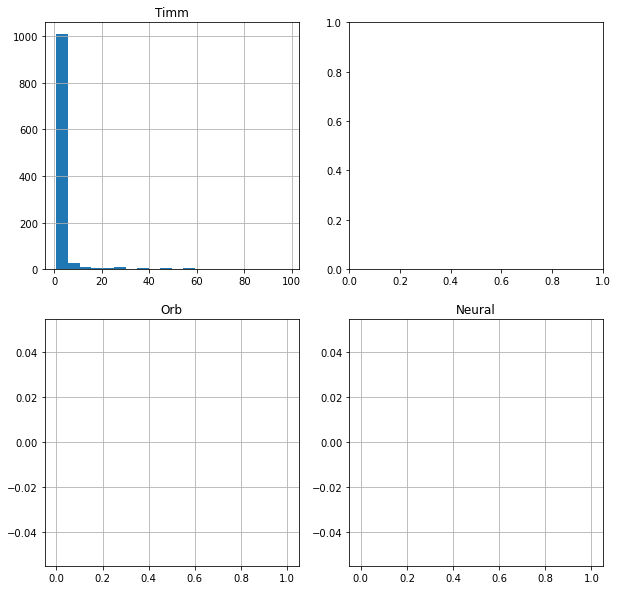

In [22]:
logdir = "Logs20211001_7"
# Load all the logs into a single dataframe for processing
log_files = glob("Logs/"+logdir+"/*") # these are the logs that we're loading
print(log_files)
joined_logs = pd.concat([pd.read_csv(i) for i in log_files])
print(joined_logs)
print("Ranking")
mpref=""
fig, axes = plt.subplots(nrows=2, ncols=2)
joined_logs[joined_logs['method']==mpref+'Timm_vit_small_r26_s32_224']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,0])
axes[0,0].set_title('Timm')
joined_logs[joined_logs['method']==mpref+'Orb']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,0])
axes[1,0].set_title('Orb')
joined_logs[joined_logs['method']==mpref+'Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[1,1])
axes[1,1].set_title('Neural')
joined_logs[joined_logs['method']=='Zernike']['rank'].hist(bins=20, figsize=(10,10), ax=axes[2,1])
axes[2,1].set_title('Your Ad Here')
joined_logs[joined_logs['method']==mpref+'Small_Neural']['rank'].hist(bins=20, figsize=(10,10), ax=axes[0,1])
axes[0,1].set_title('Small Neural')
#joined_logs[joined_logs['method']=='trained_neural_method']['rank'].hist(bins=20, figsize=(10,10), ax=axes[3,1])
#axes[3,1].set_title('Trained Neural')

In [12]:
class timm_method(method_base):
    def __init__(self, database = None, modelname=timm_names[0], cuda=False):
        self.model = timm.create_model(modelname,pretrained=True,num_classes=0)
        if cuda:
            self.model = self.model.cuda()
        config = resolve_data_config({},model=self.model)
        self.transform = create_transform(**config)
        self.topil=transforms.ToPILImage()
        self.nameval = 'Timm_'+modelname
        self.cuda=cuda
    def name(self):
        return self.nameval
    def create_query(self,img,**kwargs):
        timg=self.topil(img)
        timg=self.transform(timg).unsqueeze(0)
        if self.cuda:
            timg=timg.cuda()
        return self.model(timg).squeeze().detach().cpu().numpy()
    def compare_queries(self,v1,v2,**kwargs):
        return np.dot(v1,v2)

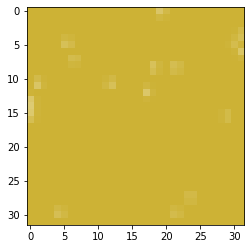

In [28]:
plt.imshow(split_image(images[0])[1])

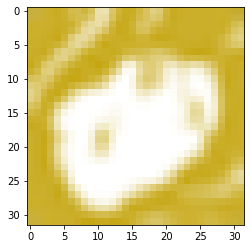

In [29]:
plt.imshow(images[0])

In [37]:
cimg=cv2.imread('tdl.png')

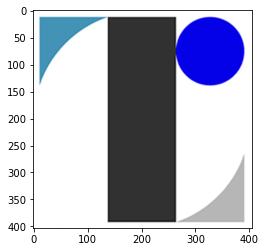

In [38]:
plt.imshow(cimg)

IndexError: list index out of range

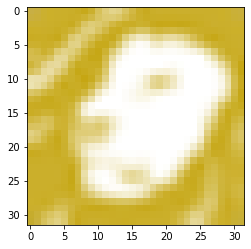

In [47]:
plt.imshow(images[0].transpose(1,0,2))